Projeto para disciplina de IA 2022-1 para o artigo - Professora Karla Figueiredo

Aluno Luiz Carlos da Silva Leão

Modelos de previsão do preço do Bitcoin baseados em machine learning

Bitcoin é a criptomoeda mais antiga e conhecida, lançada pela primeira vez como código aberto em 2009 pelo anônimo Satoshi Nakamoto. O Bitcoin serve como um meio descentralizado de troca digital, com transações verificadas e registradas em um livro público distribuído (a blockchain) sem a necessidade de uma autoridade confiável de manutenção de registros ou intermediário central. Os blocos de transação contêm um hash criptográfico SHA-256 de blocos de transação anteriores e, portanto, são "encadeados", servindo como um registro imutável de todas as transações que já ocorreram. Como acontece com qualquer moeda/commodity no mercado, a negociação de bitcoin por instituições financeiras continuam a crescer. Abaixo encontra-se um projeto com utilização dos dados do valor de mercado em dólar do Bitcoin para testar ferramentas de machine learning com o objetivo de prever o preço do Bitcoin

Descrição de Dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Script para importação dos dados diretamente da Blockchain

In [ ]:
import time
import requests
import pandas as pd

urls = [
'https://blockchain.info/charts/market-price',
'https://blockchain.info/charts/total-bitcoins',
'https://blockchain.info/charts/market-cap',
'https://blockchain.info/charts/trade-volume',
'https://blockchain.info/charts/blocks-size',
'https://blockchain.info/charts/avg-block-size',
'https://blockchain.info/charts/n-orphaned-blocks',
'https://blockchain.info/charts/n-transactions-per-block',
'https://blockchain.info/charts/median-confirmation-time',
'https://blockchain.info/charts/hash-rate',
'https://blockchain.info/charts/difficulty',
'https://blockchain.info/charts/miners-revenue',
'https://blockchain.info/charts/transaction-fees',
'https://blockchain.info/charts/cost-per-transaction-percent',
'https://blockchain.info/charts/cost-per-transaction',
'https://blockchain.info/charts/n-unique-addresses',
'https://blockchain.info/charts/n-transactions',
'https://blockchain.info/charts/n-transactions-total',
'https://blockchain.info/charts/n-transactions-excluding-popular',
'https://blockchain.info/charts/n-transactions-excluding-chains-longer-than-100',
'https://blockchain.info/charts/output-volume',
'https://blockchain.info/charts/estimated-transaction-volume',
'https://blockchain.info/charts/estimated-transaction-volume-usd'
]

suffix_to_add = '?timespan=8years&format=csv'

def get_btc_data():
    counter = 0
    for url in urls:
        header = ['Date', "btc_" + url.split("/")[-1].replace("-","_")]
        print(header[-1])
        temp_df = pd.read_csv(url+suffix_to_add, header=None, names=header)
        if counter == 0:
            df = temp_df.copy()
        else:
            df = pd.merge(df, temp_df, on="Date", how="left")
        print(temp_df.shape, df.shape)
        counter += 1
        time.sleep(1)
    df.to_csv("/content/drive/MyDrive/Colab Notebooks/Bitcoin-DM/bitcoin_dataset2.csv", index=False)
    
get_btc_data()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bitcoin-DM/bitcoin_dataset2.csv')

In [ ]:
dados.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-02-23 00:00:00,0.0,2110700.0,0.0,0.0,0.0,0.000216,0.0,1.0,0.0,...,25100.000000,0.0,252.0,252.0,42613.0,252.0,252.0,12600.0,50.0,0.0
1,2010-02-24 00:00:00,0.0,2120200.0,0.0,0.0,0.0,0.000282,0.0,1.0,0.0,...,179.245283,0.0,195.0,196.0,42809.0,196.0,196.0,14800.0,5300.0,0.0
2,2010-02-25 00:00:00,0.0,2127600.0,0.0,0.0,0.0,0.000227,0.0,1.0,0.0,...,1057.142857,0.0,150.0,150.0,42959.0,150.0,150.0,8100.0,700.0,0.0
3,2010-02-26 00:00:00,0.0,2136100.0,0.0,0.0,0.0,0.000319,0.0,1.0,0.0,...,64.582059,0.0,176.0,176.0,43135.0,176.0,176.0,29349.0,13162.0,0.0
4,2010-02-27 00:00:00,0.0,2144750.0,0.0,0.0,0.0,0.000223,0.0,1.0,0.0,...,1922.222222,0.0,176.0,176.0,43311.0,176.0,176.0,9101.0,450.0,0.0


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2920 non-null   object 
 1   btc_market_price                                     2920 non-null   float64
 2   btc_total_bitcoins                                   2920 non-null   float64
 3   btc_market_cap                                       2920 non-null   float64
 4   btc_trade_volume                                     2899 non-null   float64
 5   btc_blocks_size                                      2920 non-null   float64
 6   btc_avg_block_size                                   2920 non-null   float64
 7   btc_n_orphaned_blocks                                2920 non-null   float64
 8   btc_n_transactions_per_block                         2920 non-null  

Pré-processamento de dados

Limpeza de dados: Encontrando o número de valores ausentes para recursos de entrada e imputando valores ausentes.

In [ ]:
dados.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                      0
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                         0
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                            0
btc_hash_rate                                           0
btc_difficulty                                          0
btc_miners_revenue                                      0
btc_transaction_fees                                    0
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

Existem missing values em certas variáveis e eles são tratados usando a técnica abaixo

In [ ]:
dados.fillna(method='ffill', inplace=True)

Substituindo NaNs por valores anteriores no Dataset usando a técnica Forward fill. 

Substituir NaNs por média e mediana de uma coluna de recurso pode não produzir bons resultados, pois são dados de série temporal.

In [ ]:
dados.isnull().sum()

Date                                                   0
btc_market_price                                       0
btc_total_bitcoins                                     0
btc_market_cap                                         0
btc_trade_volume                                       0
btc_blocks_size                                        0
btc_avg_block_size                                     0
btc_n_orphaned_blocks                                  0
btc_n_transactions_per_block                           0
btc_median_confirmation_time                           0
btc_hash_rate                                          0
btc_difficulty                                         0
btc_miners_revenue                                     0
btc_transaction_fees                                   0
btc_cost_per_transaction_percent                       0
btc_cost_per_transaction                               0
btc_n_unique_addresses                                 0
btc_n_transactions             

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2920 non-null   object 
 1   btc_market_price                                     2920 non-null   float64
 2   btc_total_bitcoins                                   2920 non-null   float64
 3   btc_market_cap                                       2920 non-null   float64
 4   btc_trade_volume                                     2920 non-null   float64
 5   btc_blocks_size                                      2920 non-null   float64
 6   btc_avg_block_size                                   2920 non-null   float64
 7   btc_n_orphaned_blocks                                2920 non-null   float64
 8   btc_n_transactions_per_block                         2920 non-null  

Seleção de recursos

As variáveis menos significativas são analisadas usando o gráfico de valor variável e removidas para processamento posterior usando o comando 'Drop' para as respectivas variáveis. A matriz de correlação é analisada para entender a significância entre as variáveis e a relação com a variável de classificação do output.

A tabela abaixo mostra estatísticas descritivas que resumem a tendência central, dispersão e forma da distribuição de um conjunto de dados, excluindo os valores de NaN.

In [ ]:
dados.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2920.000000,2.920000e+03,2.920000e+03,2.920000e+03,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2.920000e+03,...,2920.000000,2920.000000,2.920000e+03,2920.000000,2.920000e+03,2920.000000,2920.000000,2.920000e+03,2.920000e+03,2.920000e+03
mean,897.485562,1.152051e+07,1.443022e+10,8.180278e+07,36058.374765,0.355733,0.362329,677.010924,7.547221,1.387725e+06,...,58.079229,15.237677,1.959608e+05,102922.695548,7.016399e+07,95187.560616,63770.210274,1.568570e+06,2.038262e+05,2.118495e+08
std,2400.159935,4.200938e+06,4.029263e+10,3.106000e+08,44536.901058,0.356388,0.840614,689.042018,4.956135,3.379005e+06,...,1709.115660,21.638354,2.093837e+05,103846.693961,8.475145e+07,103941.129363,69733.896388,2.272542e+06,2.675688e+05,5.903811e+08
min,0.000000,2.110700e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.657847e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.261300e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.768750,8.405100e+06,5.560588e+07,3.018514e+05,777.250000,0.024595,0.000000,55.000000,6.129167,1.169741e+01,...,1.180738,4.220581,1.719000e+04,8157.000000,2.484693e+06,6995.500000,6888.750000,4.975323e+05,9.660900e+04,9.889582e+05
50%,236.310000,1.242910e+07,3.364730e+09,1.024287e+07,15132.000000,0.199806,0.000000,378.500000,7.933333,2.640642e+04,...,2.461625,7.865943,1.325365e+05,63006.000000,3.340692e+07,55015.500000,35670.000000,1.118162e+06,1.787410e+05,3.899174e+07
75%,603.909050,1.523764e+07,8.210042e+09,2.913615e+07,59301.750000,0.688036,0.000000,1238.569055,10.237500,1.097174e+06,...,5.844059,15.285634,3.666370e+05,191465.250000,1.116330e+08,187182.750000,114920.000000,2.028524e+06,2.587235e+05,1.369944e+08
max,19498.683333,1.687682e+07,3.265254e+11,5.352016e+09,157664.996336,1.110327,7.000000,2722.625000,47.733333,2.557925e+07,...,88571.428571,161.686071,1.072861e+06,490644.000000,3.005766e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


Matriz de correlação

Plotando a Matriz de Correlação mostrando os coeficientes de correlação entre conjuntos de variáveis e a variável alvo


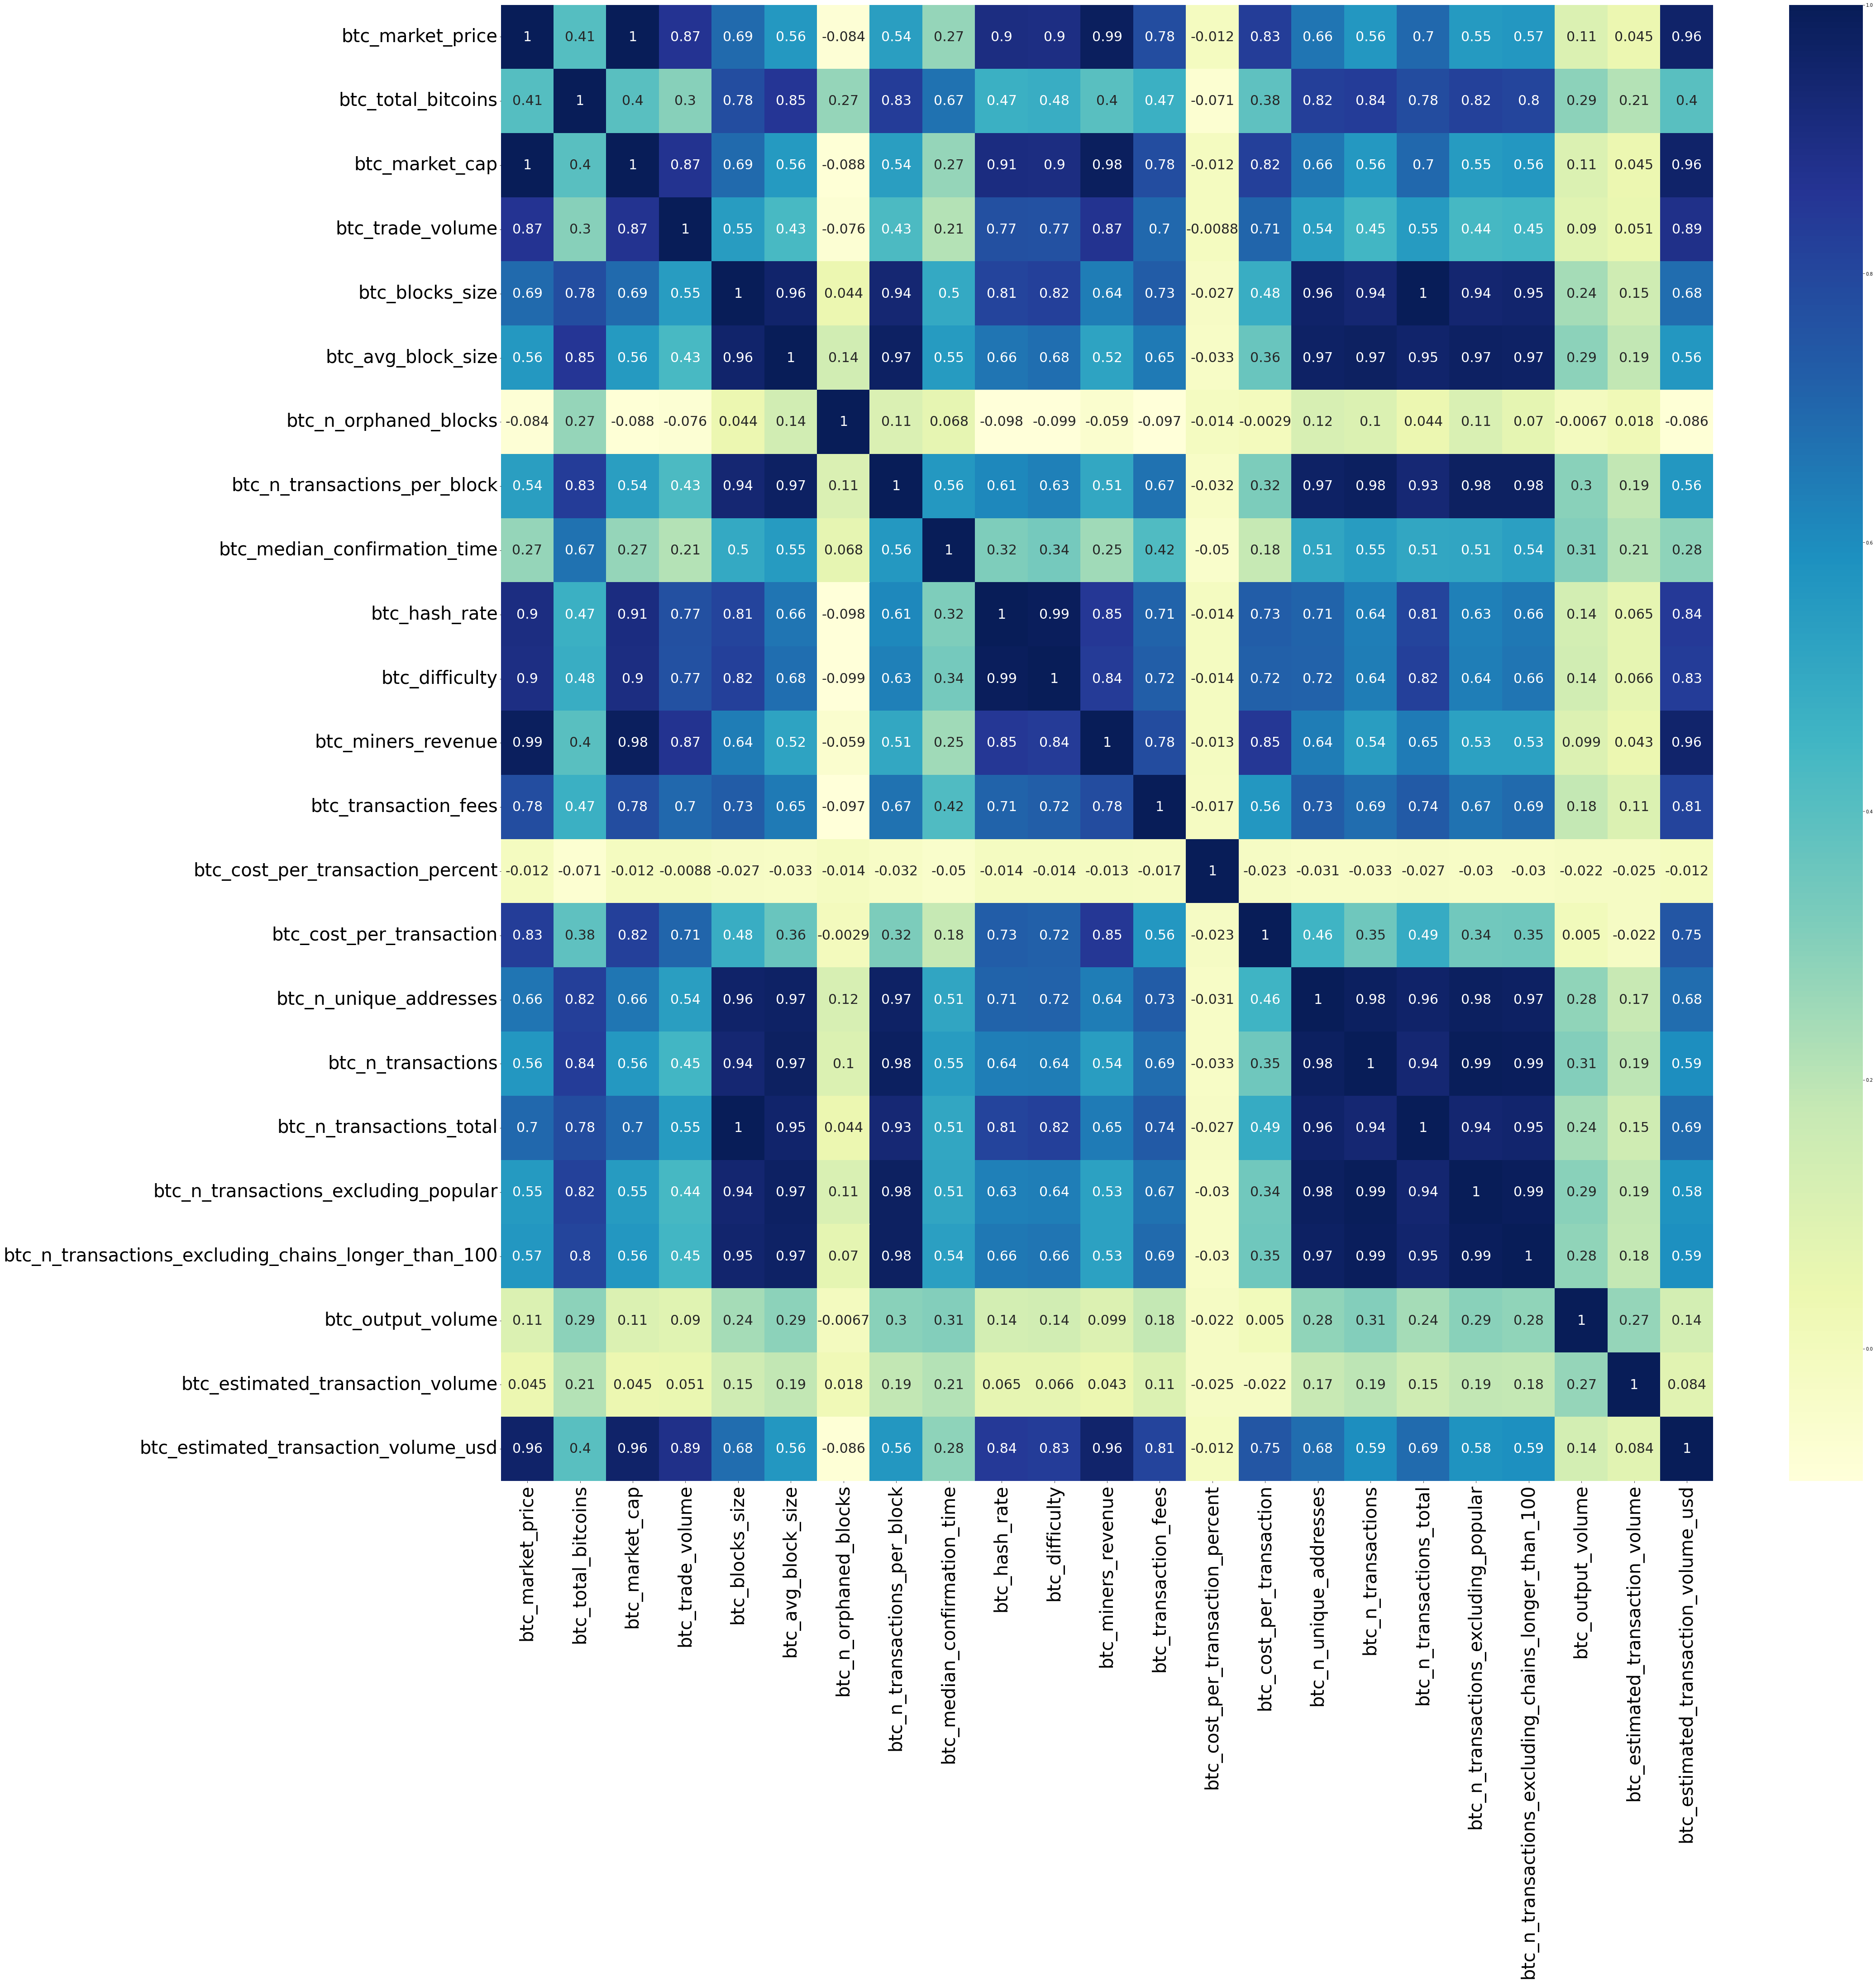

In [ ]:
correlacao = dados.corr()
fig, ax = plt.subplots(figsize=(60, 60))
ax.tick_params(labelsize=40)
sns.heatmap(correlacao, annot=True,annot_kws={"size": 30},cmap='YlGnBu')
plt.show()

De acordo com a Matriz de Correlação, btc_market_cap está fortemente correlacionado com a variável alvo (btc_market_price). O valor de mercado do BTC é uma variável redundante. É um valor total de mercado de todos os bitcoins. Valor de mercado Btc = (preço de mercado Btc) * (total de Bitcoins). Todos os recursos fortemente correlacionados com a variável de destino precisam ser removidos da análise do modelo. Portanto, descartando Btc_market_cap, Btc_estimated_tranasction_volume_usd e Btc_miners_revenue

In [ ]:
dados.drop(['btc_miners_revenue'],axis=1,inplace= True)
dados.drop(['btc_estimated_transaction_volume_usd'],axis=1,inplace= True)
dados.drop(['btc_market_cap'],axis=1,inplace= True)

Gerando o recurso de input e a variável de destino como variável X e Y.

In [ ]:
X = dados.iloc[:,2:]
Y = dados['btc_market_price']

Gráfico de Importância das Variáveis

O gráfico de importância das variáveis fornece uma lista das variáveis mais significativas em ordem decrescente por uma diminuição média. As variáveis de topo contribuem mais para o modelo do que as de baixo e também têm alto poder preditivo na previsão do preço de mercado do Bitcoin.

In [ ]:
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesRegressor
modelo = ExtraTreesRegressor()
modelo.fit(X, Y)
print(modelo.feature_importances_)

Sr = pd.Series(modelo.feature_importances_,index = X.columns)
#Sr.sort_values(inplace = True)
print(Sr)

[4.227e-02 8.759e-02 1.217e-01 1.169e-02 6.538e-06 2.749e-03 3.697e-04
 1.925e-01 2.519e-01 1.925e-02 4.953e-04 7.077e-02 1.254e-02 1.186e-03
 1.799e-01 2.833e-03 1.139e-03 7.949e-04 3.078e-04]
btc_total_bitcoins                                     0.042265
btc_trade_volume                                       0.087585
btc_blocks_size                                        0.121704
btc_avg_block_size                                     0.011689
btc_n_orphaned_blocks                                  0.000007
btc_n_transactions_per_block                           0.002749
btc_median_confirmation_time                           0.000370
btc_hash_rate                                          0.192530
btc_difficulty                                         0.251904
btc_transaction_fees                                   0.019255
btc_cost_per_transaction_percent                       0.000495
btc_cost_per_transaction                               0.070772
btc_n_unique_addresses                

In [ ]:
Sr.sort_values(inplace = True)
print(Sr)

btc_n_orphaned_blocks                                  0.000007
btc_estimated_transaction_volume                       0.000308
btc_median_confirmation_time                           0.000370
btc_cost_per_transaction_percent                       0.000495
btc_output_volume                                      0.000795
btc_n_transactions_excluding_chains_longer_than_100    0.001139
btc_n_transactions                                     0.001186
btc_n_transactions_per_block                           0.002749
btc_n_transactions_excluding_popular                   0.002833
btc_avg_block_size                                     0.011689
btc_n_unique_addresses                                 0.012543
btc_transaction_fees                                   0.019255
btc_total_bitcoins                                     0.042265
btc_cost_per_transaction                               0.070772
btc_trade_volume                                       0.087585
btc_blocks_size                         

In [ ]:
X_caracteristicas_extraidas = X[['btc_difficulty','btc_hash_rate','btc_n_transactions_total','btc_blocks_size','btc_cost_per_transaction','btc_trade_volume']]

Do gráfico de Importância Variável acima, selecionei as 6 variáveis mais significativas para o modelos em desenvolvimento.

Pré Análise

Gráfico Dados x Valor de Mercado de Bitcoin

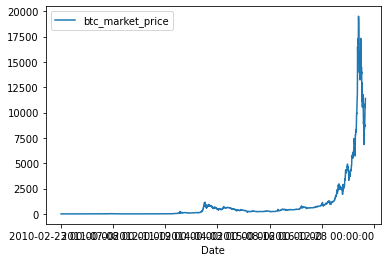

In [ ]:
dados.plot(x='Date', y='btc_market_price')
plt.show()

Valor de Mercado do Bitcoin x Dificuldade de minerar bitcoins

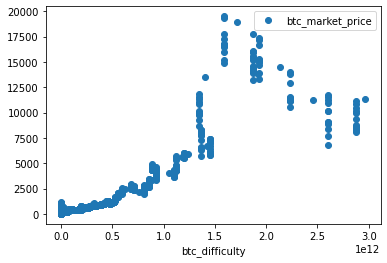

In [ ]:
dados.plot(x='btc_difficulty', y='btc_market_price', style='o')
plt.show()

A partir do gráfico acima, não se verificou relação linear entre essas duas variáveis.

Valor de Mercado do Bitcoin x Hash rate de bitcoins

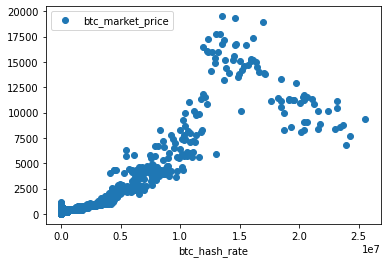

In [ ]:
dados.plot(x='btc_hash_rate', y='btc_market_price', style='o')
plt.show()

A hash rate é a velocidade na qual um computador está executando uma operação no código Bitcoin (a mineração de bitcoins). Uma hash rate mais alta é melhor ao minerar, pois aumenta a oportunidade de encontrar o próximo bloco e receber o fee. A partir do gráfico acima, podemos inferir a priori que, à medida que a hash rate aumenta, o preço do bitcoin também aumenta.

Valor de Mercado do Bitcoin x Tamanho dos blocos do bitcoin


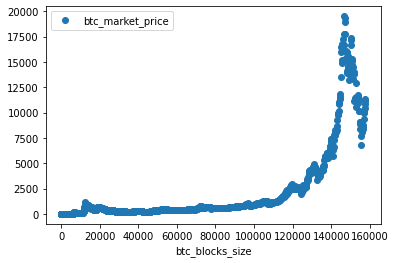

In [ ]:
dados.plot(x='btc_blocks_size', y='btc_market_price', style='o')
plt.show()

As transações de Bitcoin são coletadas em blocos e processadas por mineradores de bitcoin. Os dados relacionados a cada transação ocupam espaço em um bloco. A partir do gráfico acima, à medida que o tamanho do bloco aumenta, a taxa também aumenta. Mas também observamos no gráfico após certo ponto, o preço de mercado começou a diminuir. Portanto, pode haver alguns outros fatores que causaram a queda da taxa após certo ponto.

Valor de Mercado do Bitcoin x Volume de transações de bitcoins

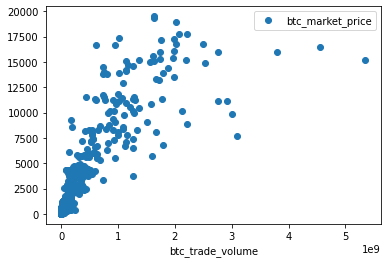

In [ ]:
dados.plot(x='btc_trade_volume', y='btc_market_price', style='o')
plt.show()

O volume de negociação de Bitcoin é o valor total em USD do volume de negociação nas principais bolsas de bitcoin. A partir do gráfico, podemos observar que o preço de mercado aumentou à medida que o volume de negociação começou a aumentar.


Extração de recursos - transformação


MinMax Scaling[0-1] foi aplicado a variáveis de entrada porque, para certas variáveis, o intervalo de valores era marginalmente alto em comparação com outros valores de variáveis. Ao fazer isso, garantimos que todas as variáveis contribuam igualmente para a análise e otimizamos as classificações de previsão.

In [ ]:
# Rescale data (between 0 and 1)
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
Xreescalado = pd.DataFrame(scaler.fit_transform(X_caracteristicas_extraidas))
# sumarizacao dos dados transformados
numpy.set_printoptions(precision=3)
Xreescalado.columns = X_caracteristicas_extraidas.columns

In [ ]:
Xreescalado.describe()

,btc_difficulty,btc_hash_rate,btc_n_transactions_total,btc_blocks_size,btc_cost_per_transaction,btc_trade_volume
count,2.920000e+03,2.920000e+03,2920.000000,2920.000000,2920.000000,2920.000000
mean,6.092416e-02,5.425199e-02,0.233323,0.228702,0.094242,0.015284
std,1.450687e-01,1.320995e-01,0.282003,0.282478,0.133829,0.058034
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5.450678e-07,4.572997e-07,0.008126,0.004930,0.026104,0.000056
50%,1.054491e-03,1.032338e-03,0.111017,0.095976,0.048649,0.001914
75%,5.338108e-02,4.289313e-02,0.371307,0.376125,0.094539,0.005444
max,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000


Tabela Matriz de Avaliação

In [ ]:
MatrizdeAvaliacao = pd.DataFrame(np.nan, index=['Reglin','knnN','Regridge','Reglasso','plyRidge','svrLnr','svrRbf','arvoreDecisao'], columns=['R-quadrado','EQM'])

Modelos preditivos

Técnica de regressão K-Nearest Neighbors

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

X_treino, X_teste, y_treino, y_teste = train_test_split(Xreescalado, Y, random_state = 0)

regknn = KNeighborsRegressor(n_neighbors = 5).fit(X_treino, y_treino)

print('Score do teste R-Quadratico {:.3f}'
     .format(regknn.score(X_teste, y_teste)))
#print(knnreg.predict(X_test))
rgknn = pd.DataFrame(regknn.predict(X_teste))

Score do teste R-Quadratico 0.982


Acima está o preço de mercado previsto do BTC para o conjunto de dados de teste

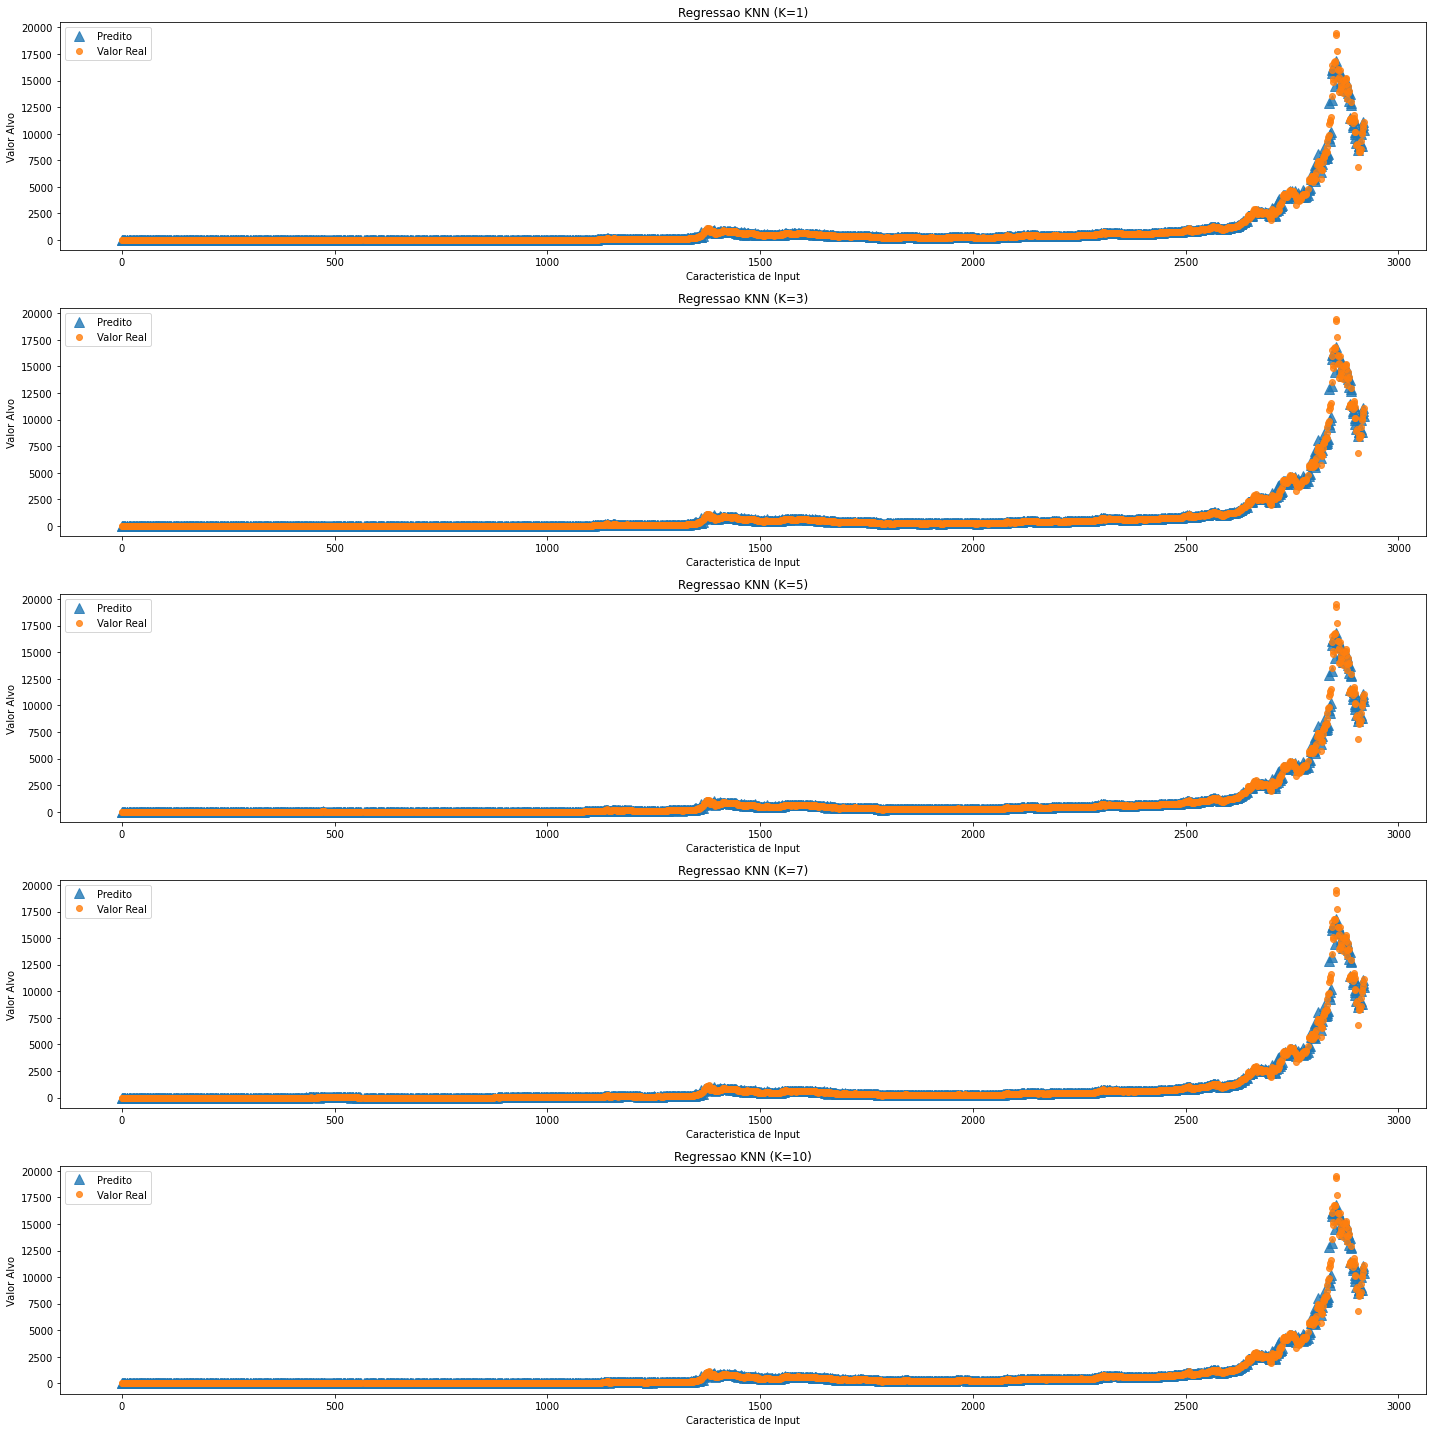

In [ ]:
import matplotlib.pyplot as plt
fig, subaxes = plt.subplots(5, 1, figsize=(20,20))
X_treino, X_teste, y_treino, y_teste = train_test_split(Xreescalado, Y, random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3,5,7,10]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_treino, y_treino)
    y_predict_output = regknn.predict(X_treino)
    thisaxis.plot(X_treino.index, y_predict_output, '^', markersize = 10,
                 label='Predito', alpha=0.8)
    thisaxis.plot(X_treino.index, y_treino, 'o', label='Valor Real', alpha=0.8)
    thisaxis.set_xlabel('Caracteristica de Input')
    thisaxis.set_ylabel('Valor Alvo')
    thisaxis.set_title('Regressao KNN (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

X_treino, X_teste, y_treino, y_teste = train_test_split(Xreescalado, Y, random_state=0)


param_grid = {'n_neighbors': [2,3,4,5,6,7,8,9,10]}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

grid_search.fit(X_treino,(y_treino))
print("Melhores parametros: {}".format(grid_search.best_params_))
print("Melhor score de validacao cruzada: {:.2f}".format(grid_search.best_score_))

Melhores parametros: {'n_neighbors': 3}
Melhor score de validacao cruzada: 0.99


Selecionando o melhor valor de K para obter a melhor pontuação de validação cruzada do Grid Search

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

X_treino, X_teste, y_treino, y_teste = train_test_split(Xreescalado, Y, random_state = 0)

regknn = KNeighborsRegressor(n_neighbors = 4).fit(X_treino, y_treino)

print('Score do teste R-Quadratico: {:.3f}'
     .format(regknn.score(X_teste, y_teste)))
#print(regknn.predict(X_teste))
rggknn = pd.DataFrame(regknn.predict(X_teste))
rggknn.head(10)

Score do teste R-Quadratico: 0.984


,0
0,229.650000
1,14883.513333
2,89.632760
3,278.945000
4,0.000000
5,511.762500
6,429.030000
7,0.000000
8,326.730000
9,11.062440


In [ ]:
MatrizdeAvaliacao['R-quadrado']['knnN'] = regknn.score(X_teste, y_teste)
MatrizdeAvaliacao['EQM']['knnN'] = np.mean((regknn.predict(X_teste) - y_teste) ** 2)

Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression

X_treino, X_teste, y_treino, y_teste = train_test_split(Xreescalado, Y,
                                                   random_state = 0)

In [ ]:
reglin = LinearRegression().fit(X_treino, y_treino)

In [ ]:
print(reglin.score(X_treino, y_treino))

print(reglin.score(X_teste, y_teste))

0.9306338712558656
0.8897747756383845


In [ ]:
regglin = pd.DataFrame(reglin.predict(X_teste))

regglin.head(10)

,0
0,117.741738
1,11454.248856
2,-34.852614
3,331.214051
4,-206.376549
5,804.495042
6,550.028869
7,-207.241895
8,500.930003
9,216.157801


In [ ]:
MatrizdeAvaliacao['R-quadrado']['Reglin'] = reglin.score(X_teste, y_teste)
MatrizdeAvaliacao['EQM']['Reglin'] = np.mean((reglin.predict(X_teste) - y_teste) ** 2)

Verificando as variáveis importantes para o modelo

O Scikit-learn é uma boa forma de traçar uma regressão linear, mas se estamos considerando a regressão linear para fins de modelagem, precisamos saber a importância das variáveis (significação) em relação à hipótese.

Para fazer isso, precisamos calcular o p-valor para cada variável e, se for menor que a significância desejada (0,05 é o corte geral para 95% de significância), podemos dizer com confiança que uma variável é significativa.

In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
modelo1=sm.OLS(y_treino,X_treino)
result = modelo1.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:       btc_market_price   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              5426.
Date:                Wed, 20 Jul 2022   Prob (F-statistic):                        0.00
Time:                        13:57:57   Log-Likelihood:                         -17267.
No. Observations:                2190   AIC:                                  3.455e+04
Df Residuals:                    2184   BIC:                                  3.458e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

De acordo com os resultados acima, todas as variáveis têm p-valor menor que 0,05, portanto, cada variável é importante para a análise do modelo de regressão.

Regressão de Ridge

In [ ]:
from sklearn.linear_model import Ridge
X_treino, X_teste, y_treino, y_teste = train_test_split(Xreescalado, Y,
                                                   random_state = 0)

ridgelin = Ridge(alpha=20.0).fit(X_treino, y_treino)

print('Dataset do Bitcoin')
print('intercepto do modelo de regressao linead de ridge: {}'
     .format(ridgelin.intercept_))
print('coeficiente do modelo de regressao linear de ridge:\n{}'
     .format(ridgelin.coef_))
print('Score do R-quadratico (treinamento): {:.3f}'
     .format(ridgelin.score(X_treino, y_treino)))
print('Score do R-quadratico (teste): {:.3f}'
     .format(ridgelin.score(X_teste, y_teste)))
print('Numero de recursos nao-zero: {}'
     .format(np.sum(ridgelin.coef_ != 0)))

Dataset do Bitcoin
intercepto do modelo de regressao linead de ridge: -359.2618790903148
coeficiente do modelo de regressao linear de ridge:
[3759.15  3530.365  794.533  737.75  4626.603 3047.144]
Score do R-quadratico (treinamento): 0.878
Score do R-quadratico (teste): 0.850
Numero de recursos nao-zero: 6


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

X_treino, X_teste, y_treino, y_teste = train_test_split(Xreescalado, Y, random_state=0)

grid_param = {'alpha': [0.1,1,2,5,10,20,100,200]}

busca_grid = GridSearchCV(Ridge(), grid_param, cv=5)

busca_grid.fit(X_treino,(y_treino))
print("Melhores parametros: {}".format(busca_grid.best_params_))
print("Melhor score de validacao cruzada: {:.2f}".format(busca_grid.best_score_))

Melhores parametros: {'alpha': 0.1}
Melhor score de validacao cruzada: 0.93


Selecionando 'alfa' como 0,1 para obter a melhor pontuação de validação cruzada para a regressão de Ridge.

In [ ]:
from sklearn.linear_model import Ridge
X_treino, X_teste, y_treino, y_teste = train_test_split(Xreescalado, Y,
                                                   random_state = 0)

ridgelin = Ridge(alpha=0.1).fit(X_treino, y_treino)

print('Dataset de Bitcoin')
print('Intercepto do modelo de regressao linear de ridge: {}'
     .format(ridgelin.intercept_))
print('Coeficiente do modelo de regressao linear de ridge:\n{}'
     .format(ridgelin.coef_))
print('Score do R-quadratico (trainamento): {:.3f}'
     .format(ridgelin.score(X_treino, y_treino)))
print('Score do R-quadratico (teste): {:.3f}'
     .format(ridgelin.score(X_teste, y_teste)))
print('Numero de recursos nao-zero:: {}'
     .format(np.sum(ridgelin.coef_ != 0)))

Dataset de Bitcoin
Intercepto do modelo de regressao linear de ridge: -237.04033308866428
Coeficiente do modelo de regressao linear de ridge:
[ 3574.522  4682.977 -2069.829  2203.468  4779.809 12687.889]
Score do R-quadratico (trainamento): 0.930
Score do R-quadratico (teste): 0.889
Numero de recursos nao-zero:: 6


In [ ]:
MatrizdeAvaliacao['R-quadrado']['Regridge'] = ridgelin.score(X_teste, y_teste)
MatrizdeAvaliacao['EQM']['Regridge'] = np.mean((ridgelin.predict(X_teste) - y_teste) ** 2)

Regressão de Lasso

In [ ]:
from sklearn.linear_model import Lasso

lassolin = Lasso(alpha=2.0, max_iter = 10000).fit(Xreescalado, Y)

print('DataSet de Bitcoin')
print('Intercepto do modelo linear de regressao de lasso: {}'
     .format(lassolin.intercept_))
print('coeficiente do modelo linear de regressao do lasso:\n{}'
     .format(lassolin.coef_))
print('Recursos Nao-zero: {}'
     .format(np.sum(lassolin.coef_ != 0)))
print('Score R-quadratico (treinamento): {:.3f}'
     .format(lassolin.score(Xreescalado, Y)))
print('Score R-quadratico (teste): {:.3f}\n'
     .format(lassolin.score(Xreescalado, Y)))
print('Recursos com peso nao-zero (ordenados pela magnitude absoluta):')

DataSet de Bitcoin
Intercepto do modelo linear de regressao de lasso: -275.3852852498269
coeficiente do modelo linear de regressao do lasso:
[ 4562.085  2856.704     0.      320.052  5061.398 12414.75 ]
Recursos Nao-zero: 5
Score R-quadratico (treinamento): 0.920
Score R-quadratico (teste): 0.920

Recursos com peso nao-zero (ordenados pela magnitude absoluta):


In [ ]:
print('Regressao de Lasso: efeito da regularizacao de alfa\n\
parametro no numero de recursos deixados no modelo final\n')


for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    lassolin = Lasso(alpha, max_iter = 10000).fit(Xreescalado, Y)
    r2_treino = lassolin.score(X_treino,y_treino)
    r2_teste = lassolin.score(X_teste,y_teste)
    
    print('Alpha = {:.2f}\nRecursos deixados: {}, treinamento R-quadratico: {:.2f}, \
teste r-quadratico: {:.2f}\n'
         .format(alpha, np.sum(lassolin.coef_ != 0), r2_treino, r2_teste))

Regressao de Lasso: efeito da regularizacao de alfa
parametro no numero de recursos deixados no modelo final

Alpha = 0.50
Recursos deixados: 5, treinamento R-quadratico: 0.93, teste r-quadratico: 0.89

Alpha = 1.00
Recursos deixados: 5, treinamento R-quadratico: 0.93, teste r-quadratico: 0.89

Alpha = 2.00
Recursos deixados: 5, treinamento R-quadratico: 0.93, teste r-quadratico: 0.89

Alpha = 3.00
Recursos deixados: 5, treinamento R-quadratico: 0.93, teste r-quadratico: 0.89

Alpha = 5.00
Recursos deixados: 5, treinamento R-quadratico: 0.93, teste r-quadratico: 0.89

Alpha = 10.00
Recursos deixados: 5, treinamento R-quadratico: 0.92, teste r-quadratico: 0.89

Alpha = 20.00
Recursos deixados: 4, treinamento R-quadratico: 0.90, teste r-quadratico: 0.87

Alpha = 50.00
Recursos deixados: 3, treinamento R-quadratico: 0.86, teste r-quadratico: 0.83



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

X_treino, X_teste, y_treino, y_teste = train_test_split(Xreescalado, Y, random_state=0)


param_grid = {'alpha': [1,2,3,5,10,20,100,200]}

grid_search = GridSearchCV(Lasso(), param_grid, cv=5)

grid_search.fit(X_treino,(y_treino))
print("Melhores parametros: {}".format(grid_search.best_params_))
print("Melhor score de validacao cruzada: {:.2f}".format(grid_search.best_score_))

Melhores parametros: {'alpha': 2}
Melhor score de validacao cruzada: 0.93


Selecionando 'alfa' como 2 para obter a melhor pontuação de validação cruzada para a regressão de Lasso

In [ ]:
from sklearn.linear_model import Lasso

lassolin = Lasso(alpha=1, max_iter = 10000).fit(Xreescalado, Y)

print('DataSet do Bitcoin')
print('interecepto do modelo linear de regressao de lasso: {}'
     .format(lassolin.intercept_))
print('coeficiente do modelo linear de regressao de lasso:\n{}'
     .format(lassolin.coef_))
print('Recursos nao-zero: {}'
     .format(np.sum(lassolin.coef_ != 0)))
print('Score R-quadratico (treinamento): {:.3f}'
     .format(lassolin.score(X_treino, y_treino)))
print('Score R-quadratico (teste)): {:.3f}\n'
     .format(lassolin.score(X_teste, y_teste)))
print('Recursos com peso nao-zero (ordenados pela magnitude absoluta):')

DataSet do Bitcoin
interecepto do modelo linear de regressao de lasso: -274.1394031829975
coeficiente do modelo linear de regressao de lasso:
[ 4316.543  3037.053     0.      318.928  5021.941 12931.927]
Recursos nao-zero: 5
Score R-quadratico (treinamento): 0.930
Score R-quadratico (teste)): 0.892

Recursos com peso nao-zero (ordenados pela magnitude absoluta):


In [ ]:
MatrizdeAvaliacao['R-quadrado']['Reglasso'] = lassolin.score(X_teste, y_teste)
MatrizdeAvaliacao['EQM']['Reglasso'] = np.mean((lassolin.predict(X_teste) - y_teste) ** 2)

Regressão Polinomial

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_treino, X_teste, y_treino, y_teste = train_test_split(Xreescalado, Y,
                                                   random_state = 0)
reglin = LinearRegression().fit(X_treino, y_treino)

print('coeficiente do modelo linear (w): {}'
     .format(reglin.coef_))
print('intercepto do modelo linear (b): {:.3f}'
     .format(reglin.intercept_))
print('Score do R-quadratico (treinamento): {:.3f}'
     .format(reglin.score(X_treino, y_treino)))
print('Score do R-quadratico (teste): {:.3f}'
     .format(reglin.score(X_teste, y_teste)))

print('\nAgora nos transformamos o dado do input original para adicionar\n\
recursos polinomiais ate o grau 2 (quadratico)\n')
polinomial = PolynomialFeatures(degree=2)
X_F1_polinomial = polinomial.fit_transform(Xreescalado)

X_treino, X_teste, y_treino, y_teste = train_test_split(X_F1_polinomial, Y,
                                                   random_state = 0)
reglin = LinearRegression().fit(X_treino, y_treino)

print('(polinomial de grau 2) coeficiente do modelo linear (w):\n{}'
     .format(reglin.coef_))
print('(polinomial de grau 2) intercepto do modelo linear (b): {:.3f}'
     .format(reglin.intercept_))
print('(polinomial de grau 2) Score do R-quadratico (treinamento): {:.3f}'
     .format(reglin.score(X_treino, y_treino)))
print('(polinomial de grau 2) Score do R-quadratico (teste): {:.3f}\n'
     .format(reglin.score(X_teste, y_teste)))

print('\nA adição de muitos recursos polinomiais muitas vezes leva a \n\
overfitting, então muitas vezes usamos recursos polinomiais em combinação\n\
com regressão que tem uma penalidade de regularização, como regressão de Ridge.\n')

X_treino, X_teste, y_treino, y_teste = train_test_split(X_F1_polinomial, Y,
                                                   random_state = 0)
reglin = Ridge().fit(X_treino, y_treino)

print('(polinomial de grau 2 + ridge) coeficiente do modelo linear (w):\n{}'
     .format(reglin.coef_))
print('(polinomial de grau 2 + ridge) intercepto do modelo linear (b): {:.3f}'
     .format(reglin.intercept_))
print('(polinomial de grau 2 + ridge) Score do R-quadratico (treinamento): {:.3f}'
     .format(reglin.score(X_treino, y_treino)))
print('(polinomial de grau 2 + ridge) Score do R-quadratico (teste): {:.3f}'
     .format(reglin.score(X_teste, y_teste)))

coeficiente do modelo linear (w): [  3399.703   4664.449 -11382.926  11480.515   5077.917  12951.209]
intercepto do modelo linear (b): -206.243
Score do R-quadratico (treinamento): 0.931
Score do R-quadratico (teste): 0.890

Agora nos transformamos o dado do input original para adicionar
recursos polinomiais ate o grau 2 (quadratico)

(polinomial de grau 2) coeficiente do modelo linear (w):
[-1.539e-06  1.843e+04 -3.608e+04  2.239e+03 -8.775e+02 -5.338e+02
 -1.244e+04  1.393e+04  8.729e+03  9.643e+05 -9.933e+05 -3.463e+04
 -5.057e+04 -3.283e+04 -1.023e+06  1.080e+06  3.363e+04  1.493e+04
 -1.064e+06  2.059e+06  2.717e+05  6.216e+04 -9.955e+05 -2.537e+05
 -2.485e+04 -6.917e+03  2.236e+04 -1.264e+04]
(polinomial de grau 2) intercepto do modelo linear (b): 12.077
(polinomial de grau 2) Score do R-quadratico (treinamento): 0.986
(polinomial de grau 2) Score do R-quadratico (teste): 0.981


A adição de muitos recursos polinomiais muitas vezes leva a 
overfitting, então muitas vezes usamos r

In [ ]:
MatrizdeAvaliacao['R-quadrado']['plyRidge'] = reglin.score(X_teste, y_teste)
MatrizdeAvaliacao['EQM']['plyRidge'] = np.mean((reglin.predict(X_teste) - y_teste) ** 2)

Regressão de Vetor de Suporte

Kernel do tipo 'RBF'


In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(Xreescalado, Y)

from sklearn.svm import SVR

svr = SVR(kernel = 'rbf',C=1e2, epsilon = 0.01, gamma=1)
svr.fit(X_treino, y_treino)
svr.score(X_teste, y_teste)

0.846636602518235

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(Xreescalado, Y, random_state=0)

grid_parametros = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1000],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

busca_no_grid = GridSearchCV(SVR(kernel = 'rbf'), grid_parametros, cv=5)

busca_no_grid.fit(X_treino, y_treino)

print("Melhores parametros: {}".format(busca_no_grid.best_params_))
print("Melhor score de validacao cruzada: {:.2f}".format(busca_no_grid.best_score_))

Melhores parametros: {'C': 1000, 'gamma': 1}
Melhor score de validacao cruzada: 0.98


Selecionando o melhor valor de C e Gamma no resultado da pesquisa no Grid para obter a melhor pontuação de validação cruzada


In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(Xreescalado, Y)

from sklearn.svm import SVR

svr = SVR(kernel = 'rbf',C=1e3, epsilon = 0.01, gamma=1)
svr.fit(X_treino, y_treino)
svr.score(X_teste, y_teste)

0.9769915668724344

In [ ]:
MatrizdeAvaliacao['R-quadrado']['svrRbf'] = svr.score(X_teste, y_teste)
MatrizdeAvaliacao['EQM']['svrRbf'] = np.mean((svr.predict(X_teste) - y_teste) ** 2)

Kernel do tipo 'Linear'

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(Xreescalado, Y)

from sklearn.svm import SVR

svr = SVR(kernel = 'linear',C=1e2, epsilon = 0.01)
svr.fit(X_treino, y_treino)
svr.score(X_teste, y_teste)

0.7474082675454623

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(Xreescalado, Y, random_state=0)

grid_de_parametros = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1000],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

busca_no_grid = GridSearchCV(SVR(kernel = 'linear'), grid_de_parametros, cv=5)

busca_no_grid.fit(X_treino, y_treino)

print("Melhores parametros: {}".format(busca_no_grid.best_params_))
print("Melhore score de validacao cruzada: {:.2f}".format(busca_no_grid.best_score_))

Melhores parametros: {'C': 1000, 'gamma': 0.001}
Melhore score de validacao cruzada: 0.90


Selecionando o melhor valor de C e Gamma no resultado da pesquisa da Grid para obter a melhor pontuação de validação cruzada.

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel = 'linear',C=1e3, epsilon = 0.01, gamma=0.001)
svr.fit(X_treino, y_treino)
svr.score(X_teste, y_teste)

0.8652786706978972

In [ ]:
MatrizdeAvaliacao['R-quadrado']['svrLnr'] = svr.score(X_teste, y_teste)
MatrizdeAvaliacao['EQM']['svrLnr'] = np.mean((svr.predict(X_teste) - y_teste) ** 2)

Regressor de Árvore de Decisão

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


X_treino, X_teste, y_treino, y_teste = train_test_split(Xreescalado, Y, random_state = 3)
clf = DecisionTreeRegressor(max_depth=3).fit(X_treino, y_treino)

print('Acuracia do classificador de arvore de decisao na amostra de treino: {:.2f}'
     .format(clf.score(X_treino, y_treino)))
print('Acuracia do classificador de arvore de decisao na amostra de teste: {:.2f}'
     .format(clf.score(X_teste, y_teste)))

Acuracia do classificador de arvore de decisao na amostra de treino: 0.98
Acuracia do classificador de arvore de decisao na amostra de teste: 0.97


In [ ]:
MatrizdeAvaliacao['R-quadrado']['arvoreDecisao'] = clf.score(X_teste, y_teste)
MatrizdeAvaliacao['EQM']['arvoreDecisao'] = np.mean((clf.predict(X_teste) - y_teste) ** 2)

Evaluation

In [ ]:
MatrizdeAvaliacao

,R-quadrado,EQM
Reglin,0.889775,636028.043702
knnN,0.983700,94053.339735
Regridge,0.888976,640637.090717
Reglasso,0.891851,624050.097659
plyRidge,0.969387,176642.690674
svrLnr,0.865279,777376.902766
svrRbf,0.976992,133647.621569
arvoreDecisao,0.978034,126746.621656


Após avaliar todos os classificadores, KNeighborsRegressor produz o melhor resultado. Como o valor de R2 para o modelo com K=4 é 0,991. Isso significa que a variância de 99,1% pode ser explicada pelo modelo. Além disso, o erro quadrático médio para KnnN é o menor comparado a todos os outros modelos.

Dados de teste de pontuação para prever o preço de mercado do Bitcoin.

In [ ]:
teste = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bitcoin-DM/test_set2.csv')
teste.head(20)

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2018-02-01 00:00:00,9083.258333,16839687.5,1.529592e+11,1.509688e+09,154613.224383,1.053963,0.0,1610.400000,12.475000,...,0.799509,78.049647,591550.0,257664.0,296946448.0,249466.0,179686.0,2.190613e+06,276923.320697,2.515366e+09
1,2018-02-02 00:00:00,8901.901667,16841787.5,1.499239e+11,2.213437e+09,154785.000775,1.022479,0.0,1404.273810,11.225000,...,0.717894,89.591902,551198.0,235918.0,297182366.0,229894.0,155128.0,1.460796e+06,330740.219185,2.944217e+09
2,2018-02-03 00:00:00,9076.678333,16843762.5,1.528854e+11,9.524038e+08,154942.458339,0.996567,0.0,1233.487342,10.475000,...,1.290914,98.824757,436196.0,194891.0,297377257.0,184856.0,131568.0,9.100425e+05,164374.024425,1.491970e+09
3,2018-02-04 00:00:00,8400.648333,16845987.5,1.415172e+11,1.080683e+09,155118.765194,0.990488,0.0,975.769663,9.275000,...,1.208997,112.999677,396694.0,173687.0,297550944.0,165753.0,125143.0,9.722485e+05,193244.213970,1.623377e+09
4,2018-02-05 00:00:00,6838.816667,16848300.0,1.152224e+11,1.793319e+09,155322.770886,1.102733,0.0,1169.529730,6.133333,...,0.967008,78.586115,486553.0,216363.0,297767307.0,208757.0,144850.0,1.848913e+06,257109.299306,1.758323e+09
5,2018-02-06 00:00:00,7685.633333,16850425.0,1.295062e+11,3.094258e+09,155504.250044,1.067524,0.0,1436.000000,7.433333,...,0.800015,72.073119,589896.0,244120.0,298011427.0,238351.0,164738.0,1.914333e+06,286153.340315,2.199270e+09
6,2018-02-07 00:00:00,8099.958333,16852187.5,1.365020e+11,1.670288e+09,155655.362901,1.071722,0.0,1515.737589,8.866667,...,0.905838,71.480272,489402.0,213719.0,298225146.0,205988.0,144287.0,1.160112e+06,208207.331711,1.686471e+09
7,2018-02-08 00:00:00,8240.536667,16853825.0,1.388846e+11,1.336662e+09,155792.690886,1.048305,0.0,1322.816794,13.675000,...,0.805963,82.053232,398607.0,173289.0,298398435.0,166517.0,126556.0,1.171510e+06,214089.826914,1.764215e+09
8,2018-02-09 00:00:00,8535.516667,16855512.5,1.438705e+11,1.093135e+09,155937.976880,1.076193,0.0,1317.481481,12.200000,...,0.890279,85.223878,462086.0,177860.0,298576295.0,173698.0,131499.0,1.144163e+06,199472.830919,1.702604e+09
9,2018-02-10 00:00:00,8319.876566,16857300.0,1.402507e+11,9.185402e+08,156085.952197,1.034792,0.0,1271.209790,9.450000,...,1.614559,85.874632,421547.0,181783.0,298758078.0,177603.0,133091.0,1.537986e+06,116211.048631,9.668616e+08


In [ ]:
variaveis_extraidas_teste = teste[['btc_difficulty','btc_hash_rate','btc_n_transactions_total','btc_blocks_size','btc_cost_per_transaction','btc_trade_volume']]

In [ ]:
score_do_teste = pd.DataFrame(regknn.predict(variaveis_extraidas_teste))

In [ ]:
score_do_teste

,0
0,9712.037667
1,9712.037667
2,9712.037667
3,9957.988500
4,9314.126417
5,9712.037667
6,9314.126417
7,9712.037667
8,9712.037667
9,9712.037667


Acima estão os valores de Bitcoin previstos pelo modelo KNN de 1º de fevereiro de 2018 a 20 de fevereiro de 2018


In [ ]:
querydados=dados[["Date","btc_market_price"]]

dadosfev18=querydados[-20:]

#data_inicio = '2018-02-01'
#data_fim   = '2018-02-15'

#dadosfev18 = querydados.query('Date >= @data_inicio and Date <= @data_fim')

score_do_teste = score_do_teste.set_index(dadosfev18.index)

dadosmerge=pd.merge(dadosfev18, score_do_teste, left_index=True, right_index=True)

dadosmerge.rename(columns = {0:'predicaoKNN'}, inplace = True)

dadosmerge

,Date,btc_market_price,predicaoKNN
2900,2018-02-01 00:00:00,9083.258333,9712.037667
2901,2018-02-02 00:00:00,8901.901667,9712.037667
2902,2018-02-03 00:00:00,9076.678333,9712.037667
2903,2018-02-04 00:00:00,8400.648333,9957.988500
2904,2018-02-05 00:00:00,6838.816667,9314.126417
2905,2018-02-06 00:00:00,7685.633333,9712.037667
2906,2018-02-07 00:00:00,8099.958333,9314.126417
2907,2018-02-08 00:00:00,8240.536667,9712.037667
2908,2018-02-09 00:00:00,8535.516667,9712.037667
2909,2018-02-10 00:00:00,8319.876566,9712.037667


<function matplotlib.pyplot.show>

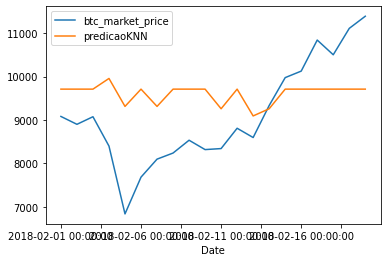

In [ ]:
#dadosmerge.plot(x="Date", y=["btc_market_price","predicaoKNN"])

dadosmerge.plot(y=["btc_market_price","predicaoKNN"])

plt.show